# Apprentice Chef Case Study - Cross-Sell Success

    Owner: Jason Lee
    Date: March 14, 2020
    Topic: Machine Learning
    Cohort: Valencia

## Company Information
 
Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door.

Each meal set takes at most 30 minutes to finish cooking at home and also comes with Apprentice Chef's award- winning disposable cookware (i.e. pots, pans, baking trays, and utensils), allowing for fast and easy cleanup. Ordering meals is very easy given their user-friendly online platform and mobile app. 

## Objective
In an effort to diversify their revenue stream, Apprentice Chef, Inc. has launched Halfway There, a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday (halfway through the work week). The executives at Apprentice Chef also believe this endeavor will create a competitive advantage based on its unique product offering of hard to find local wines. 
 
Halfway There has been exclusively offered to all of the customers in the dataset you received, and the executives would like to promote this service to a wider audience. They have tasked you with analyzing their data, developing your top insights, and building a machine learning model to predict which customers will subscribe to this service. 


## Dataset Metadata
Column	|Description|
:--|:--|
REVENUE	|Total revenue generated over the first year of a customer's journey|
CROSS_SELL_SUCCESS	|Success of promoting Halfway There (1 = SUCCESS, 0 = FAIL)|
NAME|	Full name of customer (collected upon initial registration)|
EMAIL	|Email of customer (collected upon initial registration)|
FIRST_NAME	|First name of customer (collected upon initial registration)|
FAMILY_NAME	|Last name of customer (collected upon initial registration)|
TOTAL_MEALS_ORDERED|	Total count of meals ordered per customer account|
UNIQUE_MEALS_PURCH|	Count of unique meal sets ordered per customer account|
CONTACTS_W_CUSTOMER_SERVICE	|Count of times a customer made contact with customer service (phone, chatbot, or email)|
PRODUCT_CATEGORIES_VIEWED	|Total number of meal categories viewed (online and mobile platforms combined)|
AVG_TIME_PER_SITE_VISIT	|Average platform (web or mobile) visit time per customer account|
MOBILE_NUMBER|	Customer registered with a mobile or landline number (1 = MOBILE, 0 = LANDLINE)|
CANCELLATIONS_BEFORE_NOON	|Number of meals canceled before 12 PM as per cancelation policy|
CANCELLATIONS_AFTER_NOON|	Number of meals canceled after 3 PM as per cancelation policy|
TASTES_AND_PREFERENCES	|Customer specified their tastes and preferences in their profile|
MOBILE_LOGINS|	Count of logins on the mobile platform (app)|
PC_LOGINS|	Count of logins on the web platform (website)|
WEEKLY_PLAN|	Count of weeks a customer subscribed to the weekly plan|
EARLY_DELIVERIES	|Count of orders that we delivered BEFORE the alloted delivery time|
LATE_DELIVERIES	|Count of orders that we delivered AFTER the alloted delivery time|
PACKAGE_LOCKER|	Customer's building has a package locker service or package room|
REFRIGERATED_LOCKER|	Package room has a refrigerated locker|
FOLLOWED_RECOMMENDATIONS_PCT	|Percentage of time a customer followed meal recommendations generated displayed on the web or mobile platform|
AVG_PREP_VID_TIME|	Average time in seconds a customer watched  instructional videos for meal preparation|
LARGEST_ORDER_SIZE	|Largest number of meals a customer has ordered in a single order|
MASTER_CLASSES_ATTENDED|	Count of times a customer attended master class (learning to cook)|
MEDIAN_MEAL_RATING|	Median meal satisfaction rating by customer|
AVG_CLICKS_PER_VISIT|	Average number of clicks per site visit|
TOTAL_PHOTOS_VIEWED|	Count of photos viewed on web and mobile platforms (measured in clicks)|



-------------------------------------------

## Report Overview

    1. Exploration
        - Missing values
        - Descriptive statistics
        - Potential outliers
        - Cross Sell Success
            - Distribution
            - Median Values
            - Correlation
    
    2. Feature Engineering
        - Additional Calculated Fields
        - Log
        - Outlier Detection
        - Trend Analysis
        - Potential Youth
        - Family Name
        - Number of Names
        - Full Name
        - Family Name
        - Discount Plan
        - Email Domains
        - Median Rating

    3. Dataset Preparation
        - Dropping Categorical Values
        - Updated Correlation
        
    4. Variable Selection
        - Stats Model
            - All Explanatory Variables
            - Adjusted Model
        - Pruned Tree
        
    5. Model Building
    
        - Logistic Regression
        - KNN Non Standardized
        - Classification Tree - Pruned
        - Support Vector Machine (SVM)
        - Bayes Model
        - Random Forest
        
    6. Model Performance
    
    7. Project Overview
        - Insights
        - Recommendations
        
    8. Sources
        

-----------------------------------


# 1. Exploratory Analysis
In this part of the analysis we will explore the types of data we have, look for any outliers or interesting information we could use further in the report and study if there are any relationships between the data.

In [1]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns   
import numpy            as np # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# soft code file name
file = "Apprentice_Chef_Dataset.xlsx"

#dataframe
original_df = pd.read_excel(file)

### Data Types

In [2]:
# original_df.info()

### Missing Values
There are a total 1946 variables in the dataset, so any variables with less than this will have missing values.

Variable  | Total Variables |
-|--|
FAMILY_NAME | 1899 |

Since FAMILY_NAME is the only one missing values (1899 out of 1949), we can create a missing value column but since there is only 47 values missing it won't make a significant impact. FAMILY_NAME could also be a redundant column since we have the full name. We will make a note of this and make sure to check if there is value from FAMILY_NAME when we do feature engineering further down in the process.

-------------------------------------------

## Descriptive Statistics

In [3]:
# descriptive statistics
original_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


### Overview

  - Possible binary options - CROSS_SELL_SUCCESS, MOBILE_NUMBER, TASTES_AND_PREFERENCES, PACKAGE_LOCKER, REFRIGERATED_LOCKER
  - max REVENUE is significantly higher that mean and median values - 8793.75
  - TOTAL_MEALS_ORDERED - almost 500 orders for a single customer - 493
  - AVG_TIME_PER_SITE_VISIT, one customer visits the site 1645.60
  - WEEKLY_PLAN, a customer orders 52 meals a week - interesting, normally 3 meals a day on average = 28 meals a week.
  - AVG_PREP_VID_TIME, max time a customer watches videos is 564.20 - abnormal compared to others.
  - TOTAL_PHOTOS_VIEWED, very active customer viewing photos - 1600

Looking at all these numbers is clear that there is a lot of suspicious MAX values for a variety of columns, which will be worth checking if they belong to the same individual or multiple.

### Checking Outliers
To get a better understanding on the users, below explores if there are any repetitive users or patterns that are standing out in more than one column.

In [4]:
# outliers
# # check max revenue user
# print(original_df[original_df["REVENUE"]==8793.75]['NAME'])

# # check max orders user
# print(original_df[original_df["TOTAL_MEALS_ORDERED"]==493]['NAME'])

# # check max orders user
# print(original_df[original_df["TOTAL_MEALS_ORDERED"]==493]['NAME'])

# # check max weekly plan user
# print(original_df[original_df["WEEKLY_PLAN"]==52]['NAME'])

# # check max vide watching time user
# print(original_df[original_df["AVG_PREP_VID_TIME"]==564.20]['NAME'])

# # check max photo viewed time user
# print(original_df[original_df["TOTAL_PHOTOS_VIEWED"]==1600]['NAME'])

The results from the analysis above are:

    - Leyla Hightower is the user with the highest revenue at $8793
    - Steffon Baratheon is the user with the max orders at 493
    - Preston Greenfield has spent the most time visit Apprentice Chef with 1645.60 mins
    - There are 17 users that all have the maximum weekly plan of 52 meals
    - Turnip has spend the most time watching video with 564.20 mins
    - Maron Greyjoy has viewed the most photos by a significant amount with 1600 photos viewed.

After looking into each abnormal pattern in potential outliers, none of our customers appeared more than once. This tells us there is no overlap in having a single user skewing all the results.


Breaking down the dataset, we can see that several customers have high numbers for values that you would assume would positively affect revenue, but it did not. For example, despite the customer with the most orders (493 orders), 52 other customers had more revenue. With this information, it would signal substantial discounts or inconsistent pricing. Similarly, we see the customer with the highest amount of time spent on the website with 2685 minutes, had less revenue than 480 customers (almost 25% of the customer base).


Let's explore potential outliers further by graphing the variables and spot any meaning full patterns.

## Exploring Cross Sell Success

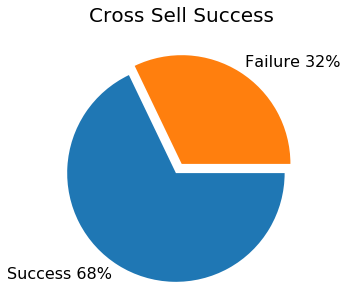

In [5]:
#Plot Pie Chart for transporation
plt.figure(figsize=(5,5))
labels = ("Success 68%" , "Failure 32%",)
explode = (0.1,0)
original_df['CROSS_SELL_SUCCESS'].value_counts().plot.pie(fontsize = 16, explode = explode, counterclock=False, labeldistance=1.1,radius = 1,labels = labels)
plt.title("Cross Sell Success", fontsize = 20)
plt.ylabel('')
plt.show()

 - Customer information are the only categorical values - NAME, EMAIL, FIRST_NAME, & FAMILY_NAME
 - Only missing values are related to FAMILY_NAME (47 missing total)

### Median Values Comparison
Below we can compare the median values for selected variables, based on whether there was a successful cross sell promotion for the wine campaign.

In [6]:
# original_df[original_df['CROSS_SELL_SUCCESS'] ==1].median()

In [7]:
# original_df[original_df['CROSS_SELL_SUCCESS'] ==0].median()

Variable | Cross Sell Success | Cross Sell Failure |
-------------| ----------| ---------------|
REVENUE                        | 1750.00 | 1725.00
TOTAL_MEALS_ORDERED            |  61.00  | 57.00
CONTACTS_W_CUSTOMER_SERVICE    |    7.00  | 7.00
AVG_TIME_PER_SITE_VISIT        |  94.5  | 93.3
AVG_PREP_VID_TIME              |  147.4  | 143.00	
LARGEST_ORDER_SIZE             |    4.00  | 4.00	
MEDIAN_MEAL_RATING             |    3.00  | 3.00
AVG_CLICKS_PER_VISIT           |    13.0      | 14.0
TOTAL_PHOTOS_VIEWED            |  300.00  | 0.00

- We can see that comparing success and failure for cross sell has slight difference in selected median values.
- Exploring the overview of the dataset we can start thinking of ways to manufacture features that can improve the relationship and intuition of the Cross Sell Success.

### Correlation
We can explore the correlation results between the variables and our response, CROSS SELL SUCCESS to determine if there is any strong insights.

In [8]:
# correaltion
# corr_original = original_df.corr().round(2)

# corr_original['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

### <center>Top Correlation Results of Cross Sell Success</center>

Variable | Correlation
----|---|
FOLLOWED_RECOMMENDATIONS_PCT    |   0.46|
CANCELLATIONS_BEFORE_NOON        |  0.16|
MOBILE_NUMBER                     | 0.10|
TASTES_AND_PREFERENCES            | 0.08|
REFRIGERATED_LOCKER              | 0.07 |

Followed recommendation has a decent size correlation at 0.45. The represents the percentage of time a customer followed meal recommendations generated displayed on the web or mobile platform. It could mean that customers who are being recommend meals are more open to clicking on promotions, which would make sense as to why they are open to the wine cross sell.

# 2. Feature Engineering
Our goal is to develop the best model to help predict the amount of revenue a customer will bring into the company in their first year. In order to accomplish this we will need to engineer additional features to help enhance the model's performance. We are given a set amount of data inputs but in order to have a more robust model, we need to develop intuition and strategies for new features.


<i> The features in your data will directly influence the predictive models you use and the results you can achieve. </i> (Source: [Brownlee (2019) Machine Learning Mastery](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/))


Before developing new features let's breakdown the types of variables we have.


BINARY:

    - CROSS_SELL_SUCCESS	
    - TASTES_AND_PREFERENCES
    - PACKAGE_LOCKER
    - REFRIGERATED_LOCKER

CATEGORICAL:

    - MOBILE_NUMBER
    
CONTINUOUS OR INTERVAL:

    - REVENUE
    - AVG_TIME_PER_SITE_VISIT
    - AVG_PREP_VID_TIME	

COUNT:

    - TOTAL_MEALS_ORDERED
    - UNIQUE_MEALS_PURCH
    - CONTACTS_W_CUSTOMER_SERVICE
    - PRODUCT_CATEGORIES_VIEWED
    - CANCELLATIONS_BEFORE_NOON
    - CANCELLATIONS_AFTER_NOON
    - PC_LOGINS	
    - MOBILE_LOGINS
    - WEEKLY_PLAN	
    - EARLY_DELIVERIES	
    - LATE_DELIVERIES
    - FOLLOWED_RECOMMENDATIONS_PCT
    - LARGEST_ORDER_SIZE
    - MASTER_CLASSES_ATTENDED         
    - MEDIAN_MEAL_RATING
    - AVG_CLICKS_PER_VISIT
    - TOTAL_PHOTOS_VIEWED
    
DISCRETE:

    - NAME                           
    - EMAIL                           
    - FIRST_NAME                      
    - FAMILY_NAME

---------------------------

## Feature - Additional Calculated Fields
Using Revenue to determine the per unit impact for clicks and total meals can provide more insight into granular impact. Similarly we can take the total cancellations as a single variable by combining cancellations before and after noon. Using this will provide more information on the effects of variables we currently have.

In [9]:
# calculated fields
original_df['REVENUE_PER_CLICK'] = original_df['REVENUE'] /original_df['AVG_CLICKS_PER_VISIT']
original_df['REVENUE_PER_ORDER'] = original_df['REVENUE'] /original_df['TOTAL_MEALS_ORDERED']
original_df['TOTAL_CANCELLATIONS'] = original_df['CANCELLATIONS_BEFORE_NOON']  + original_df['CANCELLATIONS_AFTER_NOON']

---------------------------------------------------

## Feature - Log
In this step we will obtain the logs of selected variables. Since most of the variables are all set on different scales and units, using log reduces the possible range and prevents skewness. We get the logs to ensure we have consistent range of measurements and it will add more stability to our model. The benefits of using log include the following:

    - Manages skewed data
    - Distribution resembles Gaussian
    - Decreases effects from outliers
    - More robust model
    
Source: [Ençberoğlu (2019) - Towards Data Science](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)


In [10]:
# for loop to get the log of select columns
log_list = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
            'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','PC_LOGINS',
            'AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT']

for column in log_list:
    original_df['log_'+ column] = original_df[column].transform(np.log)

-------------------------------------------------------

## Feature - Outlier Detection (Thresholds)
As we mentioned earlier there were several customers that flagged some potential outliers in the exploration page. To address this, we can use normal distribution graphs to identify, and use the insights to set threshold boundaries for creating outlier specific features.

In [11]:
# # histograms

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(3, 3, 1)
# sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('Total Meals')

# ########################
# plt.subplot(3, 3, 2)
# sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('Unique Meals Purchased')

# ########################

# plt.subplot(3, 3, 3)
# sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('Customer Service Contact')

# ########################

# plt.subplot(3, 3, 4)
# sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('Product Categories')

# ########################

# plt.subplot(3, 3, 5)
# sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('Avg Time Visit')

# ##########################

# plt.subplot(3, 3, 6)
# sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('Before 12pm Cancel')

# plt.tight_layout()

# ########################
# ########################
# fig, ax = plt.subplots(figsize = (10, 8))

# plt.subplot(3, 3, 1)
# sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('After 12pm Cancel')

# ########################

# plt.subplot(3, 3, 2)
# sns.distplot(original_df['PC_LOGINS'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('PC Logins')

# ########################

# plt.subplot(3, 3, 3)
# sns.distplot(original_df['WEEKLY_PLAN'],
#              bins = 10,
#              color = 'orange')
# plt.xlabel('Weekly Plan')

# ########################

# plt.subplot(3, 3, 4)
# sns.distplot(original_df['EARLY_DELIVERIES'],
#              bins = 'fd',
#              rug  = True,
#              color = 'r')
# plt.xlabel('Early Delivery')

# ########################

# plt.subplot(3, 3, 5)
# sns.distplot(original_df['LATE_DELIVERIES'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('Late Delivery')


# ########################

# plt.subplot(3, 3, 6)
# sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('Followed Recommendations')

# plt.tight_layout()

# ########################
# ########################
# fig, ax = plt.subplots(figsize = (10, 8))

# plt.subplot(3, 3, 1)
# sns.distplot(original_df['AVG_PREP_VID_TIME'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('Avg Prep Video Time')

# ########################

# plt.subplot(3, 3, 2)
# sns.distplot(original_df['LARGEST_ORDER_SIZE'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('Largest Order Size')

# ########################
# plt.subplot(3, 3, 3)
# sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
#              bins  = 'fd',
#              color = 'r')
# plt.xlabel('Master Classes Attened')

# ########################

# plt.subplot(3, 3, 4)
# sns.distplot(original_df['MEDIAN_MEAL_RATING'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('Median Meal Rating')

# ########################

# plt.subplot(3, 3, 5)
# sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('Avg Clicks Per Visit')

# ########################

# plt.subplot(3, 3, 6)
# sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
#              bins  = 'fd',
#              color = 'orange')
# plt.xlabel('Total Photos Video')
# plt.tight_layout()
# ########################

In [12]:
# Setting thresholds for features
TOTAL_MEALS_ORDERED_hi           = 150         # we can see a normal distribution if we cut of at this point
UNIQUE_MEALS_PURCH_hi            = 8           # we can see a normal distribution if we cut of at this point
CONTACTS_W_CUSTOMER_SERVICE_hi   = 9           # we can see a normal distribution if we cut of at this point
PRODUCT_CATEGORIES_VIEWED_lo     = 2           # setting this as MIN will exclude outliers
PRODUCT_CATEGORIES_VIEWED_hi     = 8           # setting this as MAX will exclude outliers
AVG_TIME_PER_SITE_VISIT_hi       = 175         # we can see a normal distribution if we cut of at this point
CANCELLATIONS_BEFORE_NOON_hi     = 3           # setting this as MIN will exclude outliers
CANCELLATIONS_AFTER_NOON_hi      = 0           # setting this as MIN will exclude outliers
PC_LOGINS_lo                     = 5           # setting this as MIN will exclude outliers
PC_LOGINS_hi                     = 6           # setting this as MAX will exclude outliers
WEEKLY_PLAN_hi                   = 18          # we can see a normal distribution if we cut of at this point
EARLY_DELIVERIES_hi              = 2           # we can see a normal distribution if we cut of at this point
LATE_DELIVERIES_hi               = 7           # we can see a normal distribution if we cut of at this point
AVG_PREP_VID_TIME_hi             = 250         # we can see a normal distribution if we cut of at this point
LARGEST_ORDER_SIZE_lo            = 3           # setting this as MIN will exclude outliers
LARGEST_ORDER_SIZE_hi            = 6           # setting this as MAX will exclude outliers  
MASTER_CLASSES_ATTENDED_hi       = 1           # we can see a normal distribution if we cut of at this point
MEDIAN_MEAL_RATING_hi            = 3           # we can see a normal distribution if we cut of at this point
AVG_CLICKS_PER_VISIT_lo          = 9           # setting this as MIN will exclude outliers
AVG_CLICKS_PER_VISIT_hi          = 17.5        # setting this as MAX will exclude outliers 
TOTAL_PHOTOS_VIEWED_hi           = 50          # we can see a normal distribution if we cut of at this point

# Feature Engineering (outlier thresholds)
###########################################


# total meals ordered
original_df['out_TOTAL_MEALS_ORDERED'] = 0
total_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = total_hi,
                                value      = 1,
                                inplace    = True)

# unique meals purchase
original_df['out_UNIQUE_MEALS_PURCH'] = 0
unique_hi = original_df.loc[0:,"out_UNIQUE_MEALS_PURCH"][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = unique_hi,
                                    value = 1,
                                    inplace = True)

# customer service contacts
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
customer_service_hi = original_df.loc[0:,"out_CONTACTS_W_CUSTOMER_SERVICE"][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = customer_service_hi,
                                    value = 1,
                                    inplace = True)

# product categories viewed
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
product_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
product_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = product_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = product_lo,
                                 value      = 1,
                                 inplace    = True)


# average visit time
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
avg_time_hi = original_df.loc[0:,"out_AVG_TIME_PER_SITE_VISIT"][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = avg_time_hi,
                                    value = 1,
                                    inplace = True)

# before noon cancels
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
before_noon_hi = original_df.loc[0:,"out_CANCELLATIONS_BEFORE_NOON"][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = before_noon_hi,
                                    value = 1,
                                    inplace = True)

# after noon cancels
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
after_noon_hi = original_df.loc[0:,"out_CANCELLATIONS_AFTER_NOON"][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = after_noon_hi,
                                    value = 1,
                                    inplace = True)

# product categories viewed
original_df['out_PC_LOGINS'] = 0
pc_logins_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]
pc_logins_lo = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = pc_logins_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = pc_logins_lo,
                                 value      = 1,
                                 inplace    = True)


# weekly plan
original_df['out_WEEKLY_PLAN'] = 0
weekly_hi = original_df.loc[0:,"out_WEEKLY_PLAN"][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = weekly_hi,
                                    value = 1,
                                    inplace = True)

# early delivery
original_df['out_EARLY_DELIVERIES'] = 0
early_hi = original_df.loc[0:,"out_EARLY_DELIVERIES"][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = early_hi,
                                    value = 1,
                                    inplace = True)

# late delivery
original_df['out_LATE_DELIVERIES'] = 0
late_hi = original_df.loc[0:,"out_LATE_DELIVERIES"][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = late_hi,
                                    value = 1,
                                    inplace = True)

# avergae video time
original_df['out_AVG_PREP_VID_TIME'] = 0
avg_video_hi = original_df.loc[0:,"out_AVG_PREP_VID_TIME"][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = avg_video_hi,
                                    value = 1,
                                    inplace = True)

# largest order size
original_df['out_LARGEST_ORDER_SIZE'] = 0
order_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
order_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = order_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = order_lo,
                                 value      = 1,
                                 inplace    = True)


# master classess attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
master_hi = original_df.loc[0:,"out_MASTER_CLASSES_ATTENDED"][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = master_hi,
                                    value = 1,
                                    inplace = True)

# meal rating
original_df['out_MEDIAN_MEAL_RATING'] = 0
rating_hi = original_df.loc[0:,"out_MEDIAN_MEAL_RATING"][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = rating_hi,
                                    value = 1,
                                    inplace = True)


# average clicks per visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
clicks_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
clicks_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = clicks_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = clicks_lo,
                                 value      = 1,
                                 inplace    = True)

# total photos viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
photos_hi = original_df.loc[0:,"out_TOTAL_PHOTOS_VIEWED"][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = photos_hi,
                                    value = 1,
                                    inplace = True)

Looking at each of these graphs, we want to make threshold minimum and maximum limits for each variable. Below are the threshold limits and reasoning as to why they were set.

Now that we have our thresholds, we can set the parameters for building each new feature. We will focus on creating new features by tagging a number 1, if a variable is greater or less than the thresholds we set earlier. The format for outlier columns will follow the same format as previous example - out_column_name"

Example:

    out_TOTAL_MEALS_ORDERED

-----------------------------------------------------

## Feature - Trend Analysis (Thresholds)
Using scatter plots will help provide insights on if there are any clusters forming, and if we can identify any patterns outside of outliers. This process will require setting thresholds based on when items seem to be scattering more, or clustering more.

In [13]:
# # scatter plots trend analyssi 
# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(3, 3, 1)
# sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
#                 y = original_df['REVENUE'],
#                 color = 'g')

# ########################

# plt.subplot(3, 3, 2)
# sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
#                 y = original_df['REVENUE'],
#                 color = 'y')

# ########################

# plt.subplot(3, 3, 3)
# sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')

# ########################
# plt.subplot(3, 3, 4)
# sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
#                 y = original_df['REVENUE'],
#                 color = 'r')

# #######################
# plt.subplot(3, 3, 5)
# sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')

# ########################
# plt.subplot(3, 3, 6)
# sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
#                 y = original_df['REVENUE'],
#                 color = 'r')

# plt.tight_layout()

# ########################
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(3, 3, 1)
# sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
#                 y = original_df['REVENUE'],
#                 color = 'g')

# ########################

# plt.subplot(3, 3, 2)
# sns.scatterplot(x = original_df['PC_LOGINS'],
#                 y = original_df['REVENUE'],
#                 color = 'y')

# ########################

# plt.subplot(3, 3, 3)
# sns.scatterplot(x = original_df['WEEKLY_PLAN'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')

# ########################
# plt.subplot(3, 3, 4)
# sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
#                 y = original_df['REVENUE'],
#                 color = 'r')

# #######################
# plt.subplot(3, 3, 5)
# sns.scatterplot(x = original_df['LATE_DELIVERIES'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')

# ########################

# plt.subplot(3, 3, 6)
# sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
#                 y = original_df['REVENUE'],
#                 color = 'g')

# plt.tight_layout()

# ########################
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(3, 3, 1)
# sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
#                 y = original_df['REVENUE'],
#                 color = 'r')


# ########################

# plt.subplot(3, 3, 2)
# sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
#                 y = original_df['REVENUE'],
#                 color = 'g')

# ########################

# plt.subplot(3, 3, 3)
# sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
#                 y = original_df['REVENUE'],
#                 color = 'y')

# ########################
# plt.subplot(3, 3, 4)
# sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')

# #######################
# plt.subplot(3, 3, 5)
# sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
#                 y = original_df['REVENUE'],
#                 color = 'r')


# ######################
# plt.subplot(3, 3, 6)
# sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
#                 y = original_df['REVENUE'],
#                 color = 'orange')

# plt.tight_layout()
# ########################

In [14]:
# Setting thresholds for features
TOTAL_MEALS_ORDERED_hi           = 200        # plots begin to scatter
CONTACTS_W_CUSTOMER_SERVICE_hi   = 9          # plots begin to scatter
AVG_TIME_PER_SITE_VISIT_hi       = 200        # plots begin to scatter  
LATE_DELIVERIES_hi               = 9          # plots begin to scatter
AVG_PREP_VID_TIME_hi             = 225        # plots begin to scatter

MASTER_CLASSES_ATTENDED_at       = 1          # one inflated
UNIQUE_MEALS_PURCH_at            = 0          # zero inflated  
CANCELLATIONS_AFTER_NOON_at      = 0          # zero inflated          
WEEKLY_PLAN_at                   = 0          # zero inflated  
MEDIAN_MEAL_RATING_at            = 3          # three inflated      
TOTAL_PHOTOS_VIEWED_at           = 0          # zero inflated       

###########################################
## Feature Engineering (trends thresholds)
###########################################


# total meals ordered
original_df['tre_TOTAL_MEALS_ORDERED'] = 0
total_hi = original_df.loc[0:,'tre_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['tre_TOTAL_MEALS_ORDERED'].replace(to_replace = total_hi,
                                value      = 1,
                                inplace    = True)

# # customer service contacts
# original_df['tre_CONTACTS_W_CUSTOMER_SERVICE'] = 0
# customer_service_hi = original_df.loc[0:,"tre_CONTACTS_W_CUSTOMER_SERVICE"][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

# original_df['tre_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = customer_service_hi,
#                                     value = 1,
#                                     inplace = True)

# after noon cancels
original_df['tre_CANCELLATIONS_AFTER_NOON'] = 0
after_noon_hi = original_df.loc[0:,"tre_CANCELLATIONS_AFTER_NOON"][original_df['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_at]

original_df['tre_CANCELLATIONS_AFTER_NOON'].replace(to_replace = after_noon_hi,
                                    value = 1,
                                    inplace = True)

# weekly plan
original_df['tre_WEEKLY_PLAN'] = 0
weekly_hi = original_df.loc[0:,"tre_WEEKLY_PLAN"][original_df['WEEKLY_PLAN'] == WEEKLY_PLAN_at]

original_df['tre_WEEKLY_PLAN'].replace(to_replace = weekly_hi,
                                    value = 1,
                                    inplace = True)

# late delivery
original_df['tre_LATE_DELIVERIES'] = 0
late_hi = original_df.loc[0:,"tre_LATE_DELIVERIES"][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['tre_LATE_DELIVERIES'].replace(to_replace = late_hi,
                                    value = 1,
                                    inplace = True)

# avergae video time
original_df['tre_AVG_PREP_VID_TIME'] = 0
avg_video_hi = original_df.loc[0:,"tre_AVG_PREP_VID_TIME"][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['tre_AVG_PREP_VID_TIME'].replace(to_replace = avg_video_hi,
                                    value = 1,
                                    inplace = True)

# master classess attended
original_df['tre_MASTER_CLASSES_ATTENDED'] = 0
master_hi = original_df.loc[0:,"tre_MASTER_CLASSES_ATTENDED"][original_df['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_at]

original_df['tre_MASTER_CLASSES_ATTENDED'].replace(to_replace = master_hi,
                                    value = 1,
                                    inplace = True)

# meal rating
original_df['tre_MEDIAN_MEAL_RATING'] = 0
rating_hi = original_df.loc[0:,"tre_MEDIAN_MEAL_RATING"][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_at]

original_df['tre_MEDIAN_MEAL_RATING'].replace(to_replace = rating_hi,
                                    value = 1,
                                    inplace = True)

# total photos viewed
original_df['tre_TOTAL_PHOTOS_VIEWED'] = 0
photos_hi = original_df.loc[0:,"tre_TOTAL_PHOTOS_VIEWED"][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_at]

original_df['tre_TOTAL_PHOTOS_VIEWED'].replace(to_replace = photos_hi,
                                    value = 1,
                                    inplace = True)

We want to set these threshold to make sure we are accounting for any patterns in our customer's behavior. Making sure we cut any abnormal changes before they can skew our model performance. Following similar steps from previous examples, we will no build new features based on the threshold above - tagging either a 0 or 1 depending if the threshold boundary is met.

The new threshold columns will be tagged with the format "tre_column_name"

Example:

    tre_LATE_DELIVERIES
    
Let's check the new columns are inputed.

In [15]:
# # check columns
# original_df.columns

----------------------------------------------------

## Feature - Potential Youth
Looking in the the dataset we can inspect the NAME column and find a some users have the word "son" or "daughter" in their name. This could potential tell us if they are young, and gives us an opportunity to classify them as a potential youth category.

In [16]:
# potential youth
original_df['potential_youth'] = 0

#looping to find youth
for index, val in original_df.iterrows():
    if 'son' in original_df.loc[ index , 'NAME']:
        original_df.loc[index, 'potential_youth'] = 1
    elif 'daughter' in original_df.loc[ index , 'NAME']:
        original_df.loc[index, 'potential_youth'] = 1

In [17]:
# # cross sell success
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['potential_youth']==0)]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['potential_youth']==0]['CROSS_SELL_SUCCESS'].count()

### <center>Cross Sell Results</center>


Youth | % Success | % Failures |
---|----|---|
Potential Youth | 72% | 28% |
Not Youth |  68% |32% |

Not much difference in Cross Sell success conversion. This is an interesting insights, since we could assume that if a user is a youth they would be purchasing the wine. Unless they are a son or daughter of another user, but meet the requirement for age. Given that the youth feature we developed have a 72% success rate we can look into this further and monitor if it will have a significant impact on the model performance.


------------------------------------------------

## Feature - Family Name
Below we can explore the number of family members there are per name. When we explored the dataset initial we could see there were a number of members that had same names so we can expect a variety of large families.

Family Name | Count |
---|---|
Frey         | 79
Stark        | 32
Lannister    | 29
Tyrell       | 28
Targaryen    | 24
Targaryen    | 17
Greyjoy      | 16
Hightower    | 16
Florent      | 14
Vance        | 14

Exploring the different family names, the name "Frey" appears very frequently a total of 79 times, which is almost twice the amount of the second name "Stark".

We can develop a binary feature to determine whether or not a user is part of that family, and monitor it's influence on the success of cross selling. 


In [18]:
# Most common family name - making them binary
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].astype(str)

#column with all 0s
original_df['frey_family'] = 0

#loop to calissify frey family
for index, val in original_df.iterrows():
    if 'Frey' in original_df.loc[ index , 'FAMILY_NAME']:
        original_df.loc[index, 'frey_family'] = 1

### <center>Family Name Results</center>


Name | Count |
---|----|
Frey Family | 92  |
Not Frey | 1854 |

Interesting to see that even though our original dataset found only 79 Frey family members but when we developed this function to find all family names with  "Frey"  the results outputted 92 users. The Frey family name provides a decent sized sample to create a categorical binary feature.

We will explore the success of the cross sell with the Frey family.

In [19]:
# # cross sell success
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['frey_family']!=1)]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['frey_family']!=1]['CROSS_SELL_SUCCESS'].count()

### <center>Cross Sell Results</center>


DOMAIN | % Success | % Failures |
---|----|---|
Frey Family | 66% | 34% |
Not Frey |  68% |32% |

Also looking at the cross sell success of the Frey name with Wine purchases there is no significant difference in conversion, since both are around 66-68% success rates.

-------------------------------------

## Feature - Number of Names
There are multiple users that have extended names in both their full name and their family name. It will be interesting to split up and count the number of names in a single name. Below we will split the names by using a custom built strong function to get a count of the names available in our dataset.

In [20]:
# function to split names
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

### Full Name
We will first split the full name and see how many users have longer names.

In [21]:
# number of names in full name
text_split_feature(col = 'NAME',
                   df  = original_df,
                   new_col_name = 'NUM_OF_NAMES')

In [22]:
# # cross sell success
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['NUM_OF_NAMES']==6)]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['NUM_OF_NAMES']==6]['CROSS_SELL_SUCCESS'].count()

### <center>Full Name Length Count </center>

Number of Names | Count |
--|--|
2  |  1201|
1   |  591|
3   |   98|
5   |   35|
6   |   12|
4    |   9|

We can see majority of users have the 2 names, most commonly a first and last name. Interestingly we can see a decent amount of users have 3 names.

Below let's explore the cross sell success based on name count.

### <center>Cross Sell Results</center>


DOMAIN | % Success | % Failures |
---|----|---|
1 Name | 51% | 49% |
2 Names |  76% |24% |
3 Names| 71% | 29% |
4 Names| 56% | 44% |
5 Names| 69% | 31% |
6 Names| 83% | 17% |

We can see that our 2nd most popular same length frequency count is 2, and it has 76% cross sell success. This can prove to be valuable insights later as we build the model since it is telling us potentially people will short full names tend to buy more wine. In comparison people who have 1 name in their full name would mean they do not have a last name and have low success in converting into a wine customer.

### Family Name
As well as the full name, we want to see if any customers have long last names.

In [23]:
# number of family names
text_split_feature(col = 'FAMILY_NAME',
                   df  = original_df,
                   new_col_name = 'NUM_OF_FAMILY_NAMES')

In [24]:
# # cross sell success
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['NUM_OF_FAMILY_NAMES']==4)]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['NUM_OF_FAMILY_NAMES']==4]['CROSS_SELL_SUCCESS'].count()

### <center>Family Name Length Count </center>
Number of Family Names | Count |
--|--|
1  |  1800|
2   |  134|
3   |    7|
4   |    5|

We would expect to see customers with a single family name, but there are a number of users have last names at leats 2 names long. This potentially could add value later on in our model's performance.

### <center>Cross Sell Results</center>


DOMAIN | % Success | % Failures |
---|----|---|
1 Name | 68% | 32% |
2 Names |  73% |27% |
3 Names| 43% | 57% |
4 Names| 60% | 40% |

We can see that customer with 1 or 2 long family names have relatively high conversion for cross sell success. Users with 4 names also have a decent success rate, however there is only a sample size of 5 users so that would not be sufficient to validate that.

----------------------------------

## Feature - Discount Plan
The company states that a customer who meet the requirement below they will be eligible to receive a discount.


Weekly Meal Plan | Total Meals| Discount |
----|--| --|
Basic | 3 |10% |
Premium | 5 |20%|

Below we will engineer features based on two conditions:

    1. Must have a Weekly subscription which means at least a 1
    2. Either have 3 or more total meals ordered to be eligible

In [25]:
# engineer discount
discount_plan = []

for index, col in original_df.iterrows():
    
    if (original_df.loc[index, 'WEEKLY_PLAN'] > 1) and (original_df.loc[index, 'TOTAL_MEALS_ORDERED'] == 3 or original_df.loc[index, 'TOTAL_MEALS_ORDERED'] == 4):
        discount_plan.append('basic_discount')
    elif (original_df.loc[index, 'WEEKLY_PLAN'] > 1) and (original_df.loc[index, 'TOTAL_MEALS_ORDERED'] > 4):
        discount_plan.append('premium_discount')
    else:
        discount_plan.append('no_discount')

discount_df = pd.DataFrame(discount_plan)

discount_df.columns = ['discount']
discount_df.head()


original_df = pd.concat([original_df, discount_df], axis = 1)


one_hot_discount = pd.get_dummies(original_df['discount'])

original_df = original_df.join([one_hot_discount])

In [26]:
#original_df['discount'].value_counts()

Discount Plan | Count |
----|--|
Basic | 0 |
Premium | 1400 |
No Discount | 546 |


- Looking at the results, there are no customers who meet the requirements of for BASIC discount.
- We only have values for either premium or no discount eligibility.
- There could be a relationship with customers who had the premium discount with their cross sell success so we can check that below.

In [27]:
# # query to find the count of users whohad a positive cross sell and a discount type
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['discount']=='no_discount')]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['discount']=='no_discount']['CROSS_SELL_SUCCESS'].count()

### <center>Cross Sell Results</center>


DOMAIN | % Success | % Failures |
---|----|---|
Premium | 68% | 32% |
Basic |  none |none |
No Discount | 68% | 32% |


We can see that a total of Premium discount and No Discount users had the same distribution in cross sell success, so this might not provide that much value as we go deeper into our models performance.


## Feature - Email Grouping
The dataset provides us with customer emails, and the types of emails per group. Within the case it states that there are 3 email groups.

    1. personal
    2. professional
    3. junk
    
To isolate whether or not an email is in this group we will need to split each email from the address and domain name. The goal is to have a single column that categorizes the emails by personal, professional and junk. To obtain this we will need to do the following:

    1. split email address
    2. group and classify email type
    3. create a new column

In [28]:
# create email dummy variables

# Splitting emails
email_list = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    email_split = original_df.loc[index, 'EMAIL'].split(sep = "@")
    
    # add for loop results to list
    email_list.append(email_split)
    
# converting into a DataFrame 
email_df = pd.DataFrame(email_list)

# renaming columns
email_df.columns = ['name' , 'EMAIL_DOMAIN']

# concat email to df
original_df = pd.concat([original_df, email_df['EMAIL_DOMAIN']],
                   axis = 1)

# email domains
personal_emails = [ 'gmail.com','protonmail.com', 'yahoo.com', 'msn.com']
 
professional_emails = [ 'amex.com','merck.com', 'mcdonalds.com','cocacola.com','jnj.com','nike.com', 'apple.com',            
                        'ibm.com', 'ge.org','dupont.com','microsoft.com','chevron.com','unitedhealth.com',
                        'travelers.com', 'exxon.com','boeing.com','verizon.com','mmm.com','pg.com','caterpillar.com',
                        'disney.com','walmart.com','visa.com','pfizer.com','jpmorgan.com', 'unitedtech.com',
                       'cisco.com','goldmansacs.com','intel.com','homedepot.com']   

jumk_emails = ['me.com', 'aol.com','hotmail.com', 'live.com', 'msn.com','passport.com' ]


domain_list = []

for domain in original_df['EMAIL_DOMAIN']:
    
    # crete lists for personal
    if domain in personal_emails:
        domain_list.append("personal") # categorical list
        
    elif domain in professional_emails:
        domain_list.append("professional") # categorical list

    elif domain in jumk_emails:
        domain_list.append("junk") # categorical list    
        
    else:
        print(domain)

# create new series for domain type
original_df['DOMAIN_TYPE'] = pd.Series(domain_list)

In [29]:
# original_df['DOMAIN_TYPE'].value_counts()

### <center>Domain Count</center>


DOMAIN | Count |
---|----|
Junk | 317 | 
Personal |  933 |
Professional | 696 | 

More people are using their personal emails when creating an account with the company.

In [30]:
# # query to find the count of users who had a positive cross sell and their domain type
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['DOMAIN_TYPE']=="professional")]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['DOMAIN_TYPE']=="professional"]['CROSS_SELL_SUCCESS'].count()

Let's explore how the effects of email grouping responds to CROSS SELL SUCCESS. Below are the percentages based on each groups proportions.

### <center>Cross Sell Results</center>


DOMAIN | % Success | % Failures |
---|----|---|
Junk | 42% | 58% |
Personal |  68% |32% |
Professional | 80% | 20% |


We can see that users who have professional domains have a pretty high successful conversion. This could mean that they are working and have more income which could encourage them to spend more in buying the wine, or are older and meet the age requirement for drinking wine.

In [31]:
# one hot emails
one_hot_email             = pd.get_dummies(original_df['DOMAIN_TYPE'])

# joining codings together
original_df = original_df.join([one_hot_email],
              sort=False)

original_df = original_df.drop(['EMAIL','EMAIL_DOMAIN', 'DOMAIN_TYPE'],
             axis = 1)

-------------------------------

## Feature - Median Rating
Given that median rating is on a set scale from 1 to 5, we can use this to create 5 dummy variables to expand our feature offerings. We can treat the median rating a categorical. Creating 5 groups based on the following:

    1. 1 = v_low_rating
    2. 2 = low_rating
    3. 3 = medium_rating
    4. 4 = high_rating
    5. 5 = v_high_rating

In [32]:
# one hot encode rating
original_df['RATING'] = 0

for index, val in original_df.iterrows():
    if original_df.loc[index, 'MEDIAN_MEAL_RATING'] == 1:
        original_df.loc[index, 'RATING'] = 'v_low_rating'
    elif original_df.loc[index, 'MEDIAN_MEAL_RATING'] == 2:
        original_df.loc[index, 'RATING'] = 'low_rating'
    elif original_df.loc[index, 'MEDIAN_MEAL_RATING'] == 3:
        original_df.loc[index, 'RATING'] = 'medium_rating'        
    elif original_df.loc[index, 'MEDIAN_MEAL_RATING'] == 4:
        original_df.loc[index, 'RATING'] = 'high_rating'
    elif original_df.loc[index, 'MEDIAN_MEAL_RATING'] == 5:
        original_df.loc[index, 'RATING'] = 'v_high_rating'
    else:
        print('error')
        
original_df['RATING'].value_counts()

one_hot_rating = pd.get_dummies(original_df['RATING'])

original_df = original_df.join([one_hot_rating])

In [33]:
# original_df['RATING'].value_counts()

### <center>Rating Count </center>

Rating | Count |
---|----|
Very Low Rating  (1)  |  99|
Low Rating (2) |  487|
Medium Rating (3) | 1087 |
High Rating (4)  |  260|
Very High Rating (5)  | 13|

It looks like that a lot of our customer rated their meals  in the middle at 3 and more customer rated their meals lower compared to higher. This can provide insights to their disappointment on their experience. 

In [34]:
# # query to find the count of users who had a positive cross sell and their domain type
# original_df[(original_df['CROSS_SELL_SUCCESS']==1) & (original_df['RATING']=="v_high_rating")]['CROSS_SELL_SUCCESS'].count()/original_df[original_df['RATING']=="v_high_rating"]['CROSS_SELL_SUCCESS'].count()

### <center>Cross Sell Results</center>

Rating | % Success | % Failures |
---|----|---|
Very Low Rating  (1)  | 65% | 35% |
Low Rating (2) |  67% |33% |
Medium Rating (3) | 68% | 32% |
High Rating (4)  | 70% | 30% |
Very High Rating (5)  |  85% |15% |

Looking at how the ratings related to the cross sell success we see a steady growth as ratings increase in scores the percentage of positive wine purchases also increase. This could result in  user enjoying their meals happily adding on the additional wine purchase to their plan.

--------------------------------------------

# 3. Dataset Preparation
Now that we have all the feature cleaned, below we want to make sure we remove the remaining columns that we will not need since we developed dummy variables or used them in another way.

In [35]:
#drop categorical values
original_df = original_df.drop(['NAME', 'FIRST_NAME', 'FAMILY_NAME',
                               'MEDIAN_MEAL_RATING','RATING', 'discount'],
                               axis = 1)

## Correlation Overview
Below explores the correlation between our response variable - Cross Sell Success and our updated dataset with our new features.

In [36]:
# corr_original = original_df.corr().round(2)

# #corr_original['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

### <center>Top Correlation Results</center>

Variable | Correlation
----|---|
FOLLOWED_RECOMMENDATIONS_PCT    |   0.46|
professional                     |  0.19|
NUM_OF_NAMES                     |  0.16|
CANCELLATIONS_BEFORE_NOON        |  0.16|
TOTAL_CANCELLATIONS               | 0.14|
MOBILE_NUMBER                     | 0.10|
junk                              |-0.25|

Looking at the top results for positive and negative correlation, we see 3 features that we engineered rank among high correlations.
        
        - professional -> this relates to the WORK email domain
        - NUM_OF_NAME -> the count of the number of names in a user has.
        - junk -> relates to the other email domain type outside personal.
        
Seeing the value in the correlation we can proceed to the next steps in identifying the model and performance. It is interesting to see that some of the feature we developed are not appearing in top correlation when they should strong results when looking at the individually.

Building the model will help determine whether or not these values are significant to our performance.

-------------------------

# 4. Variable Selection
Now that we have established all the features we have built we can use various techniques to determine which features are most value to our model performance. In the following steps we will use two techniques to obtain the optimal features for variable selection. Once we obtain the trimmed down variables we can test it on multiple models to find which performance best based on their unique criteria.

    - Stats Model -> removing features based on p-value 
    - Pruned Classification Tree -> studying a trimmed down CART model to find which values are truly significant

## Stats Model
In this step we will build a model using the statsmodel package. The goal of this is to identify the variables with the highest p-values so we can manually remove them and help optimize the model. If we don't do this step, and we look to build models using scikit learn later, redundant variables will be kept and will slow the model down.

In [37]:
# # define response and explanatory variables

# #explanatory variable - eveything but Cross Sell
# customer_data = original_df.drop('CROSS_SELL_SUCCESS', axis =1)

# #response variable
# customer_target = original_df['CROSS_SELL_SUCCESS']

### Train/Test Split
When building the train and test split to be used in this dataset we must ensure the random_state remain the same so we can monitor the performance of the model over and over again without using altered split datasets. We will also split the dataset consistently 75% training and 25% testing.

As mentioned earlier in the report we want to pass in the argument stratify to ensure, as well as the split we are getting an equal representation of our response variable success and failures. If we do not add this step we could have a split dataset with one side full of only successes which will not be a good representation of our overall data.

<i>Stratification means to sort data/people/objects into distinct groups or layers</i> - [Statistics How to](https://www.statisticshowto.datasciencecentral.com/stratification-definition/)

In [38]:
# # import necessary package
# from sklearn.model_selection import train_test_split

# # train and test split on variables
# X_train, X_test, y_train, y_test = train_test_split(
#                                             customer_data, 
#                                             customer_target,
#                                             test_size = 0.25,
#                                             random_state = 222,
#                                             stratify = customer_target)

# # merging training data for statsmodels
# customer_train = pd.concat([X_train, y_train], axis = 1)

###  Stats Model - Logistic Regression
To get an overview of the model and check which variables are significant we will run the model against all potential explanatory variables. This will help flag all variables with high p-values that we could remove.

In [39]:
# # getting explanatory variables while remopving addtional onehot encoded extra variable
# for val in customer_data:
#     print(f"{val} +")

In [40]:
# # instantiating a logistic regression model object
# logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
#                                         REVENUE +
#                                         TOTAL_MEALS_ORDERED +
#                                         UNIQUE_MEALS_PURCH +
#                                         CONTACTS_W_CUSTOMER_SERVICE +
#                                         PRODUCT_CATEGORIES_VIEWED +
#                                         AVG_TIME_PER_SITE_VISIT +
#                                         MOBILE_NUMBER +
#                                         CANCELLATIONS_BEFORE_NOON +
#                                         CANCELLATIONS_AFTER_NOON +
#                                         TASTES_AND_PREFERENCES +
#                                         PC_LOGINS +
#                                         MOBILE_LOGINS +
#                                         WEEKLY_PLAN +
#                                         EARLY_DELIVERIES +
#                                         LATE_DELIVERIES +
#                                         PACKAGE_LOCKER +
#                                         REFRIGERATED_LOCKER +
#                                         FOLLOWED_RECOMMENDATIONS_PCT +
#                                         AVG_PREP_VID_TIME +
#                                         LARGEST_ORDER_SIZE +
#                                         MASTER_CLASSES_ATTENDED +
#                                         AVG_CLICKS_PER_VISIT +
#                                         TOTAL_PHOTOS_VIEWED +
#                                         log_TOTAL_MEALS_ORDERED +
#                                         log_UNIQUE_MEALS_PURCH +
#                                         log_CONTACTS_W_CUSTOMER_SERVICE +
#                                         log_PRODUCT_CATEGORIES_VIEWED +
#                                         log_AVG_TIME_PER_SITE_VISIT +
#                                         log_PC_LOGINS +
#                                         log_AVG_PREP_VID_TIME +
#                                         log_MEDIAN_MEAL_RATING +
#                                         log_AVG_CLICKS_PER_VISIT +
#                                         out_TOTAL_MEALS_ORDERED +
#                                         out_UNIQUE_MEALS_PURCH +
#                                         out_CONTACTS_W_CUSTOMER_SERVICE +
#                                         out_PRODUCT_CATEGORIES_VIEWED +
#                                         out_AVG_TIME_PER_SITE_VISIT +
#                                         out_CANCELLATIONS_BEFORE_NOON +
#                                         out_CANCELLATIONS_AFTER_NOON +
#                                         out_PC_LOGINS +
#                                         out_WEEKLY_PLAN +
#                                         out_EARLY_DELIVERIES +
#                                         out_LATE_DELIVERIES +
#                                         out_AVG_PREP_VID_TIME +
#                                         out_LARGEST_ORDER_SIZE +
#                                         out_MASTER_CLASSES_ATTENDED +
#                                         out_MEDIAN_MEAL_RATING +
#                                         out_AVG_CLICKS_PER_VISIT +
#                                         out_TOTAL_PHOTOS_VIEWED +
#                                         tre_TOTAL_MEALS_ORDERED +
#                                         tre_CANCELLATIONS_AFTER_NOON +
#                                         tre_WEEKLY_PLAN +
#                                         tre_LATE_DELIVERIES +
#                                         tre_AVG_PREP_VID_TIME +
#                                         tre_MASTER_CLASSES_ATTENDED +
#                                         tre_MEDIAN_MEAL_RATING +
#                                         tre_TOTAL_PHOTOS_VIEWED +
#                                         potential_youth +
#                                         frey_family +
#                                         NUM_OF_NAMES +
#                                         NUM_OF_FAMILY_NAMES +
#                                         junk +
#                                         professional +
#                                         high_rating +
#                                         v_high_rating
#                                         """,
#                                         data    = customer_train)


# # fitting the model object
# results_full = logistic_full.fit()


# # checking the results SUMMARY
# results_full.summary()

### <center>Logistic Regression Overview </center>
#### <center>(Portion of Results) </center>

Dep. Variable:|	CROSS_SELL_SUCCESS	|No. Observations:|	1459|
----|---|---|---|
Model:|	Logit|	Df Residuals:|	1395|
Method:|	MLE|	Df Model:|	63|
Date:|	Wed, 11 Mar 2020|	Pseudo R-squ.:	|0.3830|
Time:|	22:12:55	|Log-Likelihood:|	-565.25|
converged:|	True	|LL-Null:	|-916.19|
Covariance Type:	|nonrobust	|LLR p-value:	|1.229e-108|





coef	|std err	|z|	P>z|	0.025|	0.975|
--------|-----------|-|-|-|-|
Intercept	|-39.6902|	1.7e+06	|-2.33e-05|	1.000|	-3.33e+06|3.33e+06|
REVENUE|	-0.0004|	0.000	|-3.198|	0.001	|-0.001|	-0.000|
TOTAL_MEALS_ORDERED|	-0.0053	|0.007	|-0.751|	0.453|	-0.019|	0.009|
UNIQUE_MEALS_PURCH	|0.4016|	0.134|	3.007|	0.003	|0.140|	0.663|
CONTACTS_W_CUSTOMER_SERVICE|	-0.0137|	0.231|	-0.059|	0.953|	-0.467|	0.439|
PRODUCT_CATEGORIES_VIEWED|	0.0584	|0.204	|0.286	|0.775	|-0.342|	0.459|
AVG_TIME_PER_SITE_VISIT	|0.0050	|0.004	|1.257	|0.209|	-0.003	|0.013|
MOBILE_NUMBER|	0.9130|	0.227|	4.015	|0.000	|0.467	|1.359|
CANCELLATIONS_BEFORE_NOON|	0.4007|	0.077|	5.232	|0.000|	0.251|	0.551|
CANCELLATIONS_AFTER_NOON	|-0.4835|	0.455|	-1.063|	0.288|	-1.375|	0.408|


These results only represent the first few lines of the model.Looking at the performance, we can see we have a lot of variables that have a p-value higher than 0.05. In general we want to reject variables that fall above this threshold. Lower than or equal to 0.05 mean's the variables are statistically significant for our model's performance and if we were to remove one we could significantly alter the results. However, we cannot base that if we do remove all p-value that are higher than 0.05 our model will be sound. Removing the high p-values would only give us addtional support to improve and continue to develop the model (Source: [Mcleod (2019) Simply Psychology](https://www.simplypsychology.org/p-value.html))

Along with the p-values we see there are numerous coefficients with negative values. The coefficient tells us that for every unit increase in that variable the change will follow suit. 

For example we see 'UNIQUE_MEALS_PURCH' has a 0.4016 coefficient, we can determine that if there is a change in positive 1 in the UNIQUE_MEALS_PURCH the overall value chances of CROSS_SELL_SUCCESS will increase by 0.4016, therefore having a positive impact on the response variable. (Source: [Princeton](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm))



### Adjusted Stats Logistic Model - Removing p-values
Below we will remove the flagged p-values one by one if they have a higher than 0.05 value, and run the model again. Our goal is to narrow down the features. The reason we remove one p-value at a time is because if we decided to remove all the high values simultaneously it may effect other variables. So we must remove one by one, then observe the changes, then proceed to remove - this ensures our results remain in tack and will not cause any skewed performance. (Source: [Minitab](https://blog.minitab.com/blog/understanding-statistics/three-common-p-value-mistakes-youll-never-have-to-make)).

In [41]:
# import statsmodels.formula.api as smf

# # instantiating a logistic regression model object
# logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
#                                         MOBILE_NUMBER +
#                                         CANCELLATIONS_BEFORE_NOON +
#                                         CANCELLATIONS_AFTER_NOON +
#                                         TASTES_AND_PREFERENCES +
#                                         MOBILE_LOGINS +
#                                         FOLLOWED_RECOMMENDATIONS_PCT +
#                                         log_TOTAL_MEALS_ORDERED +
#                                         out_TOTAL_MEALS_ORDERED +
#                                         out_CONTACTS_W_CUSTOMER_SERVICE +
#                                         out_CANCELLATIONS_BEFORE_NOON +
#                                         out_AVG_PREP_VID_TIME +
#                                         out_TOTAL_PHOTOS_VIEWED +
#                                         potential_youth +
#                                         NUM_OF_NAMES +
#                                         NUM_OF_FAMILY_NAMES +
#                                         junk +
#                                         professional
#                                         """,
#                                         data    = customer_train)

# # fitting the model object
# results_full = logistic_full.fit()

# # checking the results SUMMARY
# results_full.summary()

Dep. Variable:|	CROSS_SELL_SUCCESS	|No. Observations:|	1459|
---|---|---|----|
Model:|	Logit	|Df Residuals:	|1441|
Method:|	MLE	|Df Model:|	17|
Date:|	Thu, 12 Mar 2020|	Pseudo R-squ.:	|0.3522|
Time:|	21:54:58	|Log-Likelihood:|	-593.46|
converged:|	True|	LL-Null:	|-916.19|
Covariance Type:	|nonrobust|	LLR p-value:|	3.312e-126|


coef	|std err|	z	|P>z|	0.025|	0.975|
----|----|-----|----|----|----|
Intercept|	-4.3406|	0.817|	-5.314	|0.000	|-5.941	|-2.740|
MOBILE_NUMBER|	0.7923|	0.213	|3.714	|0.000	|0.374|	1.210|
CANCELLATIONS_BEFORE_NOON|	0.3886|	0.074|	5.247	|0.000|	0.243	|0.534|
CANCELLATIONS_AFTER_NOON|	-0.3310|	0.159	|-2.083|	0.037|	-0.643|	-0.020|
TASTES_AND_PREFERENCES	|0.3783|	0.160|	2.371	|0.018|	0.066|	0.691|
MOBILE_LOGINS|	-0.2688	|0.136|	-1.977	|0.048	|-0.535|	-0.002|
FOLLOWED_RECOMMENDATIONS_PCT|	0.0585|	0.004|	14.049|	0.000	|0.050	|0.067|
log_TOTAL_MEALS_ORDERED|	0.5196|	0.162|	3.198	|0.001|	0.201|	0.838|
out_TOTAL_MEALS_ORDERED	|-0.9791|	0.335	|-2.920|	0.003|	-1.636|	-0.322|
out_CONTACTS_W_CUSTOMER_SERVICE	|0.6322|	0.281	|2.247|	0.025|	0.081|	1.184|
out_CANCELLATIONS_BEFORE_NOON|	-1.1228|	0.387|	-2.902|	0.004	|-1.881	|-0.364|
out_AVG_PREP_VID_TIME|	0.9568|	0.473|	2.022	|0.043|	0.030|	1.884|
out_TOTAL_PHOTOS_VIEWED	|0.3522|	0.158|	2.232	|0.026	|0.043|	0.661|
potential_youth|	-2.0547|	0.570	|-3.606	|0.000|	-3.171|	-0.938|
NUM_OF_NAMES	|1.3273|	0.151|	8.809	|0.000	|1.032|	1.623|
NUM_OF_FAMILY_NAMES	|-1.9351|	0.321|	-6.035|	0.000|	-2.564	|-1.307|
junk	|-1.1875	|0.199|	-5.977	|0.000	|-1.577|	-0.798|
professional	|0.8810|	0.168	|5.234|	0.000	|0.551|	1.211|


This model now has all the p-values that were higher than 0.05 removed. We can see these specific variables to run in our Scikit learn models and test out how they respond in terms of performance. Some interesting to note for removing the values.

With these update variables for the feature selection we can observe the following:

    - Very High Rating (5), had a very high CROSS SELL SUCCESS rate but is not significant to remain.
    - professional had a high success rate and as expected remains in the features.
    - Both the number of names in full and family names have remained as significant variables.
    - potential youth despite having lower counts to classify youth, remained in the model due to significance.
    - a handful of outlier features remained.
    - no threshold features made it to the final model
    - logarithm of total meals was the only log feature that remains in the model.
    
Overall we can see a total of 17 variables to be used in the future models, and 11 of them were engineered. Proving that the feature engineering stage to be vital in helping optimize the model performance.

--------------------------------

### CART Model - Pruned Tree
Using the decision tree model, we can prune the number of leafs we would like the model to output. We do this to ensure we are reducing the amount of leafs the model will run through and provide us with a result that is easier to comprehend. Pruning the tree will help provide us a list of which features the decision tree model believes to be most significant for the model performance.

Once we obtain which features are deemed significant from the decision tree we can use this to build out a separate  variable list. This process will be used later on in the model and once we get the significant variables we can bring the variables back to this stage and use it on all the models.

We will see later that the significant variables for the pruned tree will be.

    - professional
    - junk
    - NUM_OF_NAMES
    - FOLLOWED_RECOMMENDATIONS_PCT
    - WEEKLY_PLAN
    - CANCELLATIONS_BEFORE_NOON

Similarly to the adjust p-value model, we have professional, junk, and number of names as the features we developed. However, there are significantly less features in this model. A total of 6 in comparison to the 17 we got from adjust the p-values.

-------------------------------

# 5. Model Testing - Scikit Learn

Now that we have built the model remove p-values we can test out various models in Scikit learn. We have our set of explanatory variables we want to use. We can create a dictionary with just the variables we need so we can call it in later in each training and testing dataset.

We will be testing out two types of explanatory variable selection:

    1. Logistic Regression - Adjust p-values
    2. Pruned Tree

We will use the above explanatory variables selection on the following models in Scikit Learn's library;

    1. Logistic Regression
    2. K Nearest Neighbors Non Standardized
    3. Classification Tree - Pruned
    4. Support Vector Machine - SVM
    5. Bayes
    6. Random Forest

In [42]:
# # user defined functions
# ########################################
# # optimal_neighbors
# ########################################
# def optimal_neighbors(X_data,
#                       y_data,
#                       standardize = True,
#                       pct_test=0.25,
#                       seed=802,
#                       response_type='reg',
#                       max_neighbors=20,
#                       show_viz=True):
#     """
# Exhaustively compute training and testing results for KNN across
# [1, max_neighbors]. Outputs the maximum test score and (by default) a
# visualization of the results.
# PARAMETERS
# ----------
# X_data        : explanatory variable data
# y_data        : response variable
# standardize   : whether or not to standardize the X data, default True
# pct_test      : test size for training and validation from (0,1), default 0.25
# seed          : random seed to be used in algorithm, default 802
# response_type : type of neighbors algorithm to use, default 'reg'
#     Use 'reg' for regression (KNeighborsRegressor)
#     Use 'class' for classification (KNeighborsClassifier)
# max_neighbors : maximum number of neighbors in exhaustive search, default 20
# show_viz      : display or surpress k-neigbors visualization, default True
# """    
    
    
#     if standardize == True:
#         # optionally standardizing X_data
#         scaler             = StandardScaler()
#         scaler.fit(X_data)
#         X_scaled           = scaler.transform(X_data)
#         X_scaled_df        = pd.DataFrame(X_scaled)
#         X_data             = X_scaled_df



#     # train-test split
#     X_train, X_test, y_train, y_test = train_test_split(X_data,
#                                                         y_data,
#                                                         test_size = pct_test,
#                                                         random_state = seed)


#     # creating lists for training set accuracy and test set accuracy
#     training_accuracy = []
#     test_accuracy = []
    
    
#     # setting neighbor range
#     neighbors_settings = range(1, max_neighbors + 1)


#     for n_neighbors in neighbors_settings:
#         # building the model based on response variable type
#         if response_type == 'reg':
#             clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#             clf.fit(X_train, y_train)
            
#         elif response_type == 'class':
#             clf = KNeighborsClassifier(n_neighbors = n_neighbors)
#             clf.fit(X_train, y_train)            
            
#         else:
#             print("Error: response_type must be 'reg' or 'class'")
        
        
#         # recording the training set accuracy
#         training_accuracy.append(clf.score(X_train, y_train))
    
#         # recording the generalization accuracy
#         test_accuracy.append(clf.score(X_test, y_test))


#     # optionally displaying visualization
#     if show_viz == True:
#         # plotting the visualization
#         fig, ax = plt.subplots(figsize=(12,8))
#         plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#         plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#         plt.ylabel("Accuracy")
#         plt.xlabel("n_neighbors")
#         plt.legend()
#         plt.show()
    
    
#     # returning optimal number of neighbors
#     print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
#     return test_accuracy.index(max(test_accuracy))+1


Below we can create a function that helps visualize the confusion matrix for the model performance. This will help give a visual representation of the true positive, false positives, true negatives, and false negatives.

In [43]:
# user defined function to visual confusion matrix
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

### Variable Selection
Earlier we determined which features would be optimal for p-value removal and a pruned tree. Below we can create a dictionary so we can easily call and adjust the model for easier customization.

In [44]:
#dictionary
candidate_dict = {
 
 # significant variables only from stats model
 'logit_sig'    : ['MOBILE_NUMBER',
                   'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON',
                   'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS',
                   'FOLLOWED_RECOMMENDATIONS_PCT',
                   'log_TOTAL_MEALS_ORDERED',
                   'out_TOTAL_MEALS_ORDERED',
                   'out_CONTACTS_W_CUSTOMER_SERVICE',
                   'out_CANCELLATIONS_BEFORE_NOON',
                   'out_AVG_PREP_VID_TIME',
                   'out_TOTAL_PHOTOS_VIEWED',
                   'potential_youth',
                   'NUM_OF_NAMES',
                   'NUM_OF_FAMILY_NAMES',
                   'junk',
                   'professional'
                  ],
  
# significant values from pruned tree
 'pruned_tree'  : ['professional',
                    'junk',
                    'NUM_OF_NAMES',
                    'FOLLOWED_RECOMMENDATIONS_PCT',
                    'WEEKLY_PLAN',
                    'CANCELLATIONS_BEFORE_NOON']

}

We want to make sure our response variable is CROSS_SELL_SUCCESS, and we have our newly created dictionary of significant variables indexed as our only explanatory variables to be used in the model.

In [45]:
# train/test split with the full model
customer_data   =  original_df.loc[ : , candidate_dict['pruned_tree']]
customer_target =  original_df['CROSS_SELL_SUCCESS']

### Score Metric
After running our explanatory variables through each model we will obtain the ROC AUC score, not accuracy.

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve.

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate
    False Positive Rate

Source: [Google Developers](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)


<strong>Confusion Matrix</strong><br>
The following confusion matrix can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~

TRUE NEGATIVE                                           |  FALSE POSITIVE
PREDICTED: DID NOT GET WINE (CROSS_SELL_SUCCESS = 0)    |  PREDICTED: DID GET WINE (CROSS_SELL_SUCCESS = 1)
ACTUAL:    DID NOT GET WINE (CROSS_SELL_SUCCESS = 0)    |  ACTUAL:    DID NOT GET WINE (CROSS_SELL_SUCCESS = 0)
                                                        |
--------------------------------------------------------|-------------------------------------------
FALSE NEGATIVE                                          |  TRUE POSITIVE
PREDICTED: DID NOT GET WINE (CROSS_SELL_SUCCESS = 0)    |  PREDICTED: DID GET WINE (CROSS_SELL_SUCCESS = 1)
ACTUAL:    DID GET WINE     (CROSS_SELL_SUCCESS = 1)    |  ACTUAL:    DID GET WINE (CROSS_SELL_SUCCESS = 1)
                                                        |  
~~~

---------------------------------------

## Logistic Regression
To begin the model testing, we will use the logistic regression model. We did use this model earlier with the Stats Model library, however this will be used through Scikit learn's library. Logistic regression is a common practice to get an overview of binary classification in modeling. It helps predict whether or not a model is a 0 or 1, in this case our CROSS SELL SUCCESS on whether a customer is converting into a wine purchaser.

In [46]:
# # logistic regression

# # train test split
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             test_size    = 0.25,
#             random_state = 222,
#             stratify     = customer_target)

# # INSTANTIATING a logistic regression model
# logreg = LogisticRegression(solver = 'lbfgs',
#                             C = 1,
#                             random_state = 222)


# # FITTING the training data
# logreg_fit = logreg.fit(X_train, y_train)


# # PREDICTING based on the testing set
# logreg_pred = logreg_fit.predict(X_test)


# # SCORING the results
# print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
# print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
# print('AUC  Score       :', roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(4))



# logreg_score_train = logreg_fit.score(X_train, y_train).round(4)
# logreg_score_test  = logreg_fit.score(X_test, y_test).round(4)
# logreg_AUC         = roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(4)



# # creating an empty list
# model_performance = [['Model', 'Training Accuracy',
#                       'Testing Accuracy', 'AUC Value']]

# # saving the results
# model_performance.append(['Logistic Regression',
#                           logreg_score_train,
#                           logreg_score_test,
#                           logreg_AUC])


<center> Logisitc Model AUC Score </center>

Feature Selection | Score |
---|-----|
Logistic Regression Features | 0.7242
Pruned Tree Features | 0.6961

We see the adjust stats model with adjusted p-values scored higher. This could suggest that more features, as well as those specific features help the logistic model's performance since there is a noticeable 0.03 difference betweeen the two.

In [47]:
# # creating a confusion matrix
# print(confusion_matrix(y_true = y_test,
#                        y_pred = logreg_pred))

# # calling the visual_cm function
# visual_cm(true_y = y_test,
#           pred_y = logreg_pred,
#           labels = ['Bought Wine', "Didn't buy Wine"])

---------------------------------

## KNN Non-Standardized
KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase. The goal of using KNN is to find clusters of groups that meet certain characteristics. Source: [Srivastava (2019) - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

In [48]:
# # train-test split with the nomral data
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             random_state = 222,
#             test_size = 0.25,
#             stratify = customer_target)

# # creating lists for training set accuracy and test set accuracy
# training_accuracy = []
# test_accuracy = []


# # building a visualization of 1 to 50 neighbors
# neighbors_settings = range(1, 21)


# for n_neighbors in neighbors_settings:
#     # Building the model
#     clf = KNeighborsClassifier(n_neighbors = n_neighbors)
#     clf.fit(X_train, y_train)
    
#     # Recording the training set accuracy
#     training_accuracy.append(clf.score(X_train, y_train))
    
#     # Recording the generalization accuracy
#     test_accuracy.append(clf.score(X_test, y_test))


# # plotting the visualization
# fig, ax = plt.subplots(figsize=(12,8))
# plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.show()


# # finding the optimal number of neighbors
# non_stand_opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
# print(f"""The optimal number of neighbors is {non_stand_opt_neighbors}""")


# # INSTANTIATING a model with the optimal number of neighbors
# knn_non_stand = KNeighborsClassifier(algorithm = 'auto',
#                    n_neighbors = non_stand_opt_neighbors)


# # FITTING the model based on the training data
# knn_non_stand_fit = knn_non_stand.fit(X_train, y_train)


# # PREDITCING on new data
# knn_non_stand_pred = knn_non_stand.predict(X_test)


# # SCORING the results
# print('Training Score   :', knn_non_stand.score(X_train, y_train).round(4))
# print('Testing Score    :',  knn_non_stand.score(X_test, y_test).round(4))
# print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = knn_non_stand_pred).round(4))
# print('Optimal Neighbors:', non_stand_opt_neighbors)

# # saving scoring data for future use
# knn_non_stand_score_train = knn_non_stand_fit.score(X_train, y_train).round(4)
# knn_non_stand_score_test  = knn_non_stand_fit.score(X_test, y_test).round(4)
# knn_non_stand_AUC_score  = roc_auc_score(y_true  = y_test,
#                                           y_score = knn_non_stand_pred).round(4)

# # saving the results
# model_performance.append(['KNN Non Standardized',
#                           knn_non_stand_score_train,
#                           knn_non_stand_score_test,
#                           knn_non_stand_AUC_score])


<center> KNN Non Standardized AUC Score </center>

Feature Selection | Score |
---|-----|
Logistic Regression Features | 0.7557
Pruned Tree Features | 0.7721

We see the adjusted pruned tree model scored higher by 0.02. This provides us information that using the pruned tree explanatory variables KNN was able to produce stronger pattern recognition for the nearest neighbors.

In [49]:
# # confusion matrix

# # creating a confusion matrix
# print(confusion_matrix(y_true = y_test,
#                        y_pred = knn_non_stand_pred))

# # calling the visual_cm function
# visual_cm(true_y = y_test,
#           pred_y = knn_non_stand_pred,
#           labels = ['Bought Wine', "Didn't buy Wine"])

## Classification Tree - Pruned
As mentioned earlier this is the stage where we try obtain the optimal features that was used in the models in previous steps. In a classification tree, the model breaks down each step into binary partitioning. This means, splitting a leaf (node) into two paths and determines whether or not the variable meets the requirements to continue in either direction. The goal is continuously split the tree and leafs by every new features the model outputs.

Reducing the number of leafs in the model will allow easier recognition or business insights that can produce opportunities to take action. Decision trees historically over fit models if they are not tuned and pruned. (Source: [Towards Data Science](https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac))

Below we will develop a pruned tree model. However, the original analysis the tree was built using all the explanatory variables possible to determine which variables are most significant for all the models. The results below are the updated, trimmed explanatory variables in order to simplify the analysis and not over load irrelevant variables to the audience.

In [50]:
# function to graph features importance
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(10,5))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

C:\Users\jason\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


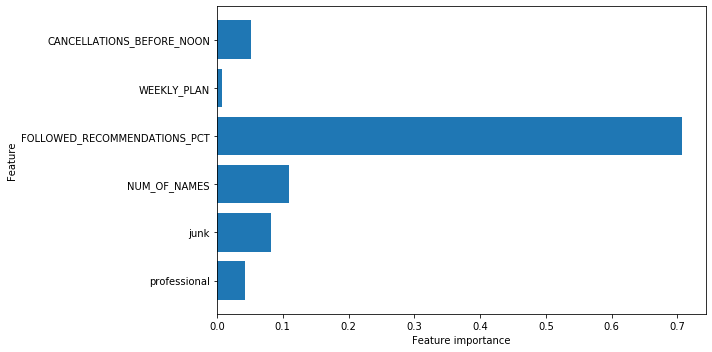

In [51]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# train-test split with the nomral data
X_train, X_test, y_train, y_test = train_test_split(
            customer_data,
            customer_target,
            random_state = 222,
            test_size = 0.25,
            stratify = customer_target)

# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth=4,
                    min_samples_leaf = 25,
                    random_state = 222)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# # SCORING the model
# print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
# print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = tree_pred).round(4))


# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)
plt.tight_layout()

---------------------------

<center> Pruned Tree AUC Score </center>

Feature Selection | Score |
---|-----|
Logistic Regression Features | 0.7314
Pruned Tree Features | 0.7162

We see the adjust Logistic Regression Features scored higher. What is more important here is to identify the features that were significant. We use these features back in the top portion of the model to see if there is a impact on model performance.


Originally we tested  all the explanatory variables on the pruned tree which gave us the insights to select the features in the graph above. We used those features to run on all the models, since it helps provide an additional insight to model performance.

We see that the following features are of value to the tree.

    - professional
    - junk
    - NUM_OF_NAMES
    - FOLLOWED_RECOMMENDATIONS_PCT
    - WEEKLY_PLAN
    - CANCELLATIONS_BEFORE_NOON
    
    
-----------------

## Support Vector Machine Model - SVM
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. 

Support vectors are the data points, which are closest to the divider known as the hyperplane of the dataset. 

A hyperplane finds a way to separates the data based on certain characteristics. The main goal is the develop a way to divide the dataset in the most efficient was possible, with the final output looking to measure the distance between the nearest points - known as the margin. Once the margin is identified,  the hyperplane that has the furthest margin between the data points in the dataset is selected.


(Source: [Datacamp](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python#svm))

In [52]:
# SVM model Kernal

# train test split
X_train, X_test, y_train, y_test = train_test_split(
            customer_data,
            customer_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = customer_target)

#import package
from sklearn.svm import SVC

#instantiate model
svc_kernal_model = SVC(kernel = 'rbf', random_state = 222)

#fit model
svc_kernal_fit = svc_kernal_model.fit(X_train, y_train)

# PREDICTING on new data
svc_kernal_pred = svc_kernal_model.predict(X_test)


# SCORING the model
print('Training ACCURACY:', svc_kernal_model.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', svc_kernal_model.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = svc_kernal_pred).round(4))

#save results
svc_kernal_score_train = svc_kernal_model.score(X_train, y_train).round(4)
svc_kernal_score_test  = svc_kernal_model.score(X_test, y_test).round(4)
svc_kernal_AUC         = roc_auc_score(y_true  = y_test,
                                          y_score = svc_kernal_pred).round(4)

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7803
AUC Score        : 0.818


<center> SVM Model AUC Score </center>

Feature Selection | Score |
---|-----|
Logistic Regression Features | 0.815
Pruned Tree Features | 0.818

We can see that the the SVM model performed well compared to past models we did. Also the pruned tree features slightly outperformed the logistic model. There is only small difference in performance, but nevertheless the pruned tree required a lot less explanatory variables compared to the logistic variables so this would speed up both performance and the AUC score.

## Bayes Model
Using the Bayes model we are able to evaluate the probability of an event happening based on historical information of that event. For example, using this model it would utilize the probability information of how likely it is a customer would successfully cross sell with the wine promotion. With the Bayes Model, it is essentially comparing the probability of the event happening with information, versus without information. The idea behind this is that we have some previous knowledge of the parameters of the model before we have any actual data.

(Source: [Towards Data Science](https://towardsdatascience.com/probability-learning-ii-how-bayes-theorem-is-applied-in-machine-learning-bd747a960962))

In [53]:
# # bayes model
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             test_size    = 0.25,
#             random_state = 222,
#             stratify     = customer_target)

# #import necessary package
# from sklearn.naive_bayes import GaussianNB

# #instantiate model
# bayes_model = GaussianNB()

# # fit model
# bayes_fit = bayes_model.fit(X_train, y_train)


# # PREDICTING on new data
# bayes_pred = bayes_model.predict(X_test)


# # SCORING the model
# print('Training ACCURACY:', bayes_model.score(X_train, y_train).round(4))
# print('Testing  ACCURACY:', bayes_model.score(X_test, y_test).round(4))
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = bayes_pred).round(4))

# bayes_score_train = bayes_model.score(X_train, y_train).round(4)
# bayes_score_test  = bayes_model.score(X_test, y_test).round(4)
# bayes_AUC         = roc_auc_score(y_true  = y_test,
#                                           y_score = bayes_pred).round(4)

<center> Bayes Model AUC Score </center>

Feature Selection | Score |
---|-----|
Logistic Regression Features | 0.7906
Pruned Tree Features |0.7467

Interesting to see a relatively large drop in the AUC score from logistic regression to the pruned tree, almost 0.5 drop which would significantly harm the model performance if we choose the pruned trees features.

##  Random Forest
Random Forest is an ensemble method, that makes multiple decision trees at random. Each individual tree would output a results based on the model parameters, which leads the most frequent results being outputted as the overall performance. The goal is to understand that decision trees that are constantly being tested will output a stronger result in comparison to one individual tree.

(Source: <a href="https://www.kdnuggets.com/2017/10/random-forests-explained.html">KD Nugget</a>)

In [54]:
# # This is the exact code we were using before
# X_train, X_test, y_train, y_test = train_test_split(
#             customer_data,
#             customer_target,
#             test_size    = 0.25,
#             random_state = 222,
#             stratify     = customer_target)

# #import necessary packages
# from sklearn.ensemble import RandomForestClassifier

# # instantiate
# rdm_forest_model = RandomForestClassifier(n_estimators = 5, 
#                                           criterion = 'entropy',
#                                           random_state = 222
#                                          )

# #fit model
# rdm_forest_fit = rdm_forest_model.fit(X_train, y_train)

# # PREDICTING on new data
# rdm_forest_pred = rdm_forest_model.predict(X_test)


# # SCORING the model
# print('Training ACCURACY:', rdm_forest_model.score(X_train, y_train).round(4))
# print('Testing  ACCURACY:', rdm_forest_model.score(X_test, y_test).round(4))
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = rdm_forest_pred).round(4))

<center> Random Forest Model AUC Score </center>

Feature Selection | Score |
---|-----|
Logistic Regression Features | 0.7378
Pruned Tree Features |0.7214

Here we see the logistic model features selection performing better than the pruned tree.

# 6. Model Comparison
Now we have all our model results, we can compare how each performed on both explanatory variable sets.

Model | Logistic Regression Features | Pruned Tree Features	|
------|------------------------------|----------------------|
Logistic Regression | 0.7242 | 0.6961|
KNN Non-Standardized | 0.7557 |0.7721|
CART - Pruned | 0.7314 | 0.7162|
SVM | 0.815 | 0.818|
Bayes |0.7906 | 0.7467|
Random Forest |  0.7378 | 0.7214|

Overall we see that the explanatory variables from the Stats Model Logistic Regression performed better on Scikit Learn Models:

    - Logistic Regression
    - CART - Pruned
    - Bayes
    - Random Forest
    
and the Pruned Tree explanatory variables performed better on:

    - SVM
    - KNN Non-Standardized
    
### Top Model
In the end the final model with the highest AUC score was the Support Vector Machine (SVM), which it outperformed all the models consistently, with the pruned tree explanatory variables having a slightly higher score.

    Support Vector Machine (SVM) Model AUC Score: 0.818
    
    
---------------------------------

# 7. Project Overview

### Insight #1

Users that signed up for their accounts using their professional work emails had shown strong significance in model performance. Users with professional emails totaled 36% (696 users) of the entire customer base and converted 80% of the time to the cross-sell campaign. \

With this information, we can potentially determine that users signing up with their work email could be earning more income, have less time to cook and prepare their food, and are at minimum age to consume wine. These users would be getting a more efficient cooking experience using Apprentice Chef’s product and would purchase wine more frequently.

### Insight #2

Classifying customers into discount levels, Basic, Premium, and no discount, there were no users in the basic discount, compared to 72% (1400) of users with a premium discount, and 546 users with no discounts.  Surprisingly the wine promotion had the same success rate, 68% for both premium and no discount groups. 

One would expect that customers with discounts would be more attracted to the wine promotion. However, the company could be losing more money, offering a premium discount to customers who are not converting the cross-sell wine promotion.  Financially the discounts could be counterproductive for cross-sell success.

### Recommendation

The business opportunity for Apprentice Chef would be to increase its presence in corporate partnerships. We saw users with professional emails, produce more robust results in converting the wine promotion. 

The startup culture, in particular, have great meal benefits, providing their employee's food at lunch and sometimes at night post work. On average, Apprentice Chef's meals cost $16.50, and a company spends $15-17 per employee meal (HighFive, 2019). Apprentice Chef should be approaching companies to provide exclusive partnership prices to supply their meals to their employees, so instead of staying back to eat lunch or dinner, they can head home and cook for themselves and their family. 

Competitor Blue Apron, provide exclusive discounts for corporates depending on meal frequency and company size (Blue Apron). With these employees spending more time at home and enjoying the services from Apprentice Chef, the wine promotion could be easier to convert. Given that their employers will supply the employees Apprentice Chef meals, the employee could add the wine promotion out of their pocket and wouldn't incur that much cost overall.
Working with companies to supply meals to their employees could monumentally increase new users, grow revenue, and cross-sell success of the wine promotion.

------------------------------------------------


# 8. Sources

1.	Blue Apron. (n.d.). Retrieved from https://www.blueapron.com/pages/corporate-sales
2.	Brownlee, J. (2019, December 26). Discover Feature Engineering, How to Engineer Features and How to Get Good at It. Retrieved from https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
3.	Chakure, A. (2019, July 7). Decision Tree Classification. Retrieved from https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac
4.	Google Developers. (n.d.). Classification: ROC Curve and AUC  |  Machine Learning Crash Course. Retrieved from https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
5.	Highfive. (2019, August 24). The Value of Providing Lunch for Employees. Retrieved from https://highfive.com/blog/value-of-providing-lunch-for-employees
6.	Mcleod, S. (2019, May 20). P-values and statistical significance. Retrieved from https://www.simplypsychology.org/p-value.html
7.	Minitab. (n.d.). Three Common P-Value Mistakes You'll Never Have to Make. Retrieved from https://blog.minitab.com/blog/understanding-statistics/three-common-p-value-mistakes-youll-never-have-to-make
8.	Princeton. (n.d.). DSS - Interpreting Regression Output. Retrieved from https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm
9.	Reinstein, I. (n.d.). Random Forests®, Explained. Retrieved from https://www.kdnuggets.com/2017/10/random-forests-explained.html
10.	Ren, E. (2019, April 1). Fundamental Techniques of Feature Engineering for Machine Learning. Retrieved from https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
11.	Srivastava, T. (2019, September 3). Introduction to KNN, K-Nearest Neighbors : Simplified. Retrieved from https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
12.	Stephanie. (2017, October 12). Stratification: Definition. Retrieved from https://www.statisticshowto.datasciencecentral.com/stratification-definition/
13.	Zornoza, J. (2019, September 5). Probability Learning II: How Bayes' Theorem is applied in Machine Learning. Retrieved from https://towardsdatascience.com/probability-learning-ii-how-bayes-theorem-is-applied-in-machine-learning-bd747a960962
